# Clase 1

## Ploteo y convolucion de firmas espectrales.

En esta clase veremos

1. Como leer un archivo.
2. Como hacer la convolucion entre una firma espectral y un sensor.
3. Como graficar la firma espectral medida en una imagen.


## Lectura de archivos

Para leer los archivos trabajaremos con *numpy*. 

Abriremos firmas espectrales provenientes de la libreria de aster

In [2]:
# Cargamos numpy
import numpy as np

Abrimos y leemos una firma espectral

In [3]:
# Creamos una variable con la direccion del archivo
firma_in = "../coberturas/firmas/jhu.becknic.vegetation.grass\
            .green.solid.gras.spectrum.txt"

# Leemos la firma.
# skip_header se usa para saltear el header del archivo
firma = np.genfromtxt(firma_in,skip_header=25)
# Convertimos la longitud de onda a nanometros
firma[:,0] = 1000*firma[:,0]
# Convierto la firma a reflectancia entre 0 y 1
firma[:,1] = firma[:,1]/100

Leemos la banda para hacer la convolucion

In [25]:
# Seleccionamos el archivo con la banda
banda_in = "../coberturas/firmas/landsat_7/band5.txt"

# Leemos la firma.
# skip_header se usa para saltear el header del archivo
banda = np.genfromtxt(banda_in)

Leemos la irradiancia solar

## Convolucion de una banda

Para hacer la convolucion de una banda, tenemos que calcular

$$ \rho_b = \frac{\int_{\lambda_{min}}^{\lambda_{max}} \rho_{\lambda, sensor} f(\lambda) d\lambda}{\int_{\lambda_{min}}^{\lambda_{max}} f(\lambda)d\lambda}$$

1. el siguiente codigo compara las firmas espectrales con la respuesa del sensor
2. calcula las funciones a integrar
3. las integra por el metodo de simpson

para el paso 3, utilizaremos la libreria scipy

In [26]:
# Creo los arrays vacios para guardar los datos
wl = np.empty(len(banda))
L = np.empty(len(banda))
f = np.empty(len(banda))

# Itero en todo el archivo de la banda
for i in range(len(banda)):
    # Guardo la longitud de onda
    wl[i] = banda[i,0]
    # Guardo la respuesta del sensor
    f[i]  = banda[i,1]
    # Guardo, si corresponde, el valor de la firma espectra
    elemento = firma[firma[:,0]==banda[i,0]]
    if elemento.size!=0:
        L[i] = elemento[0][1]
        
# Creo la mascara para filtrar valores erroneos
mascara = (L>0.000001)*(L<1e3)

# Filtro todo para los valores positivos (mayores a 0.001) de la firma espectral
wl = wl[mascara]
f = f[mascara]
L = L[mascara]
fL = f*L

In [27]:
# Importo scipy y las herramientas de integracion
import scipy as sp
from scipy import integrate

In [28]:
# Integro la funcion y hago el cociente
Lb = sp.integrate.simps(y=fL,x=wl)/sp.integrate.simps(y=f,x=wl)

## Graficar una firma espectral

Para graficar uan firma espectral volveremos a utilizar matplotlib con la opcion inline.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

*Ejemplo:* Firma espectral entre dos valores

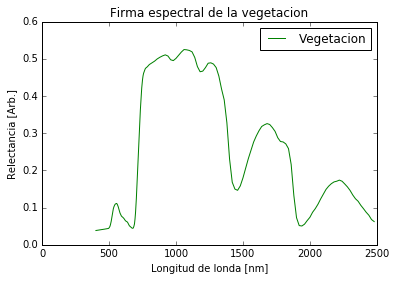

In [30]:
# Fijo lambda minimo y maximo
lmin = 400
lmax = 2500

# Creo la mascara de los valores de interes
mask = (firma[:,0]<lmax) & (firma[:,0]>lmin)

# Grafico la reflectancia contra la longitud de onda
plt.plot(firma[mask][:,0],firma[mask][:,1], label="Vegetacion", color="green")

# Incluyo la leyenda
plt.legend()
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")

*Ejemplo:* Firma espectral y respuesta del sensor

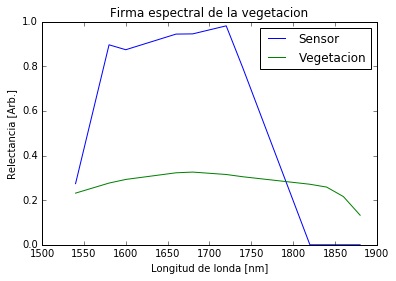

In [31]:
# Grafico la respuesta del sensor
plt.plot(wl,f, label="Sensor")
# Grafco la firma de la vegetacion
plt.plot(wl,L, label="Vegetacion")

# Incluyo la leyenda
plt.legend()
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")

*Ejemplo:* Firma espectral y puntos tomados a partir de la imagen

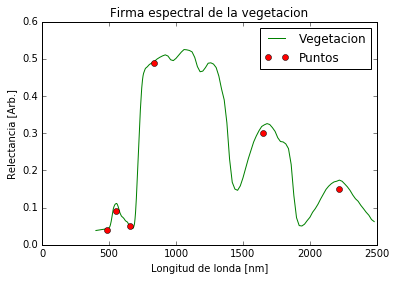

In [24]:
# Grafico primero la firma espectral
# Fijo lambda minimo y maximo
lmin = 400
lmax = 2500
# Creo la mascara de los valores de interes
mask = (firma[:,0]<lmax) & (firma[:,0]>lmin)
# Grafico la reflectancia contra la longitud de onda
plt.plot(firma[mask][:,0],firma[mask][:,1], label="Vegetacion", color="green")

# Grafico los puntos tomados en la imagen
# Fijo las longitudes de onda de cada banda
l = [485,550,660,835,1650,2220]
# Fijo la reflectancia medida en la imagen
r = [0.04,0.09,0.05,0.49,0.3,0.15]
# Grafico la reflectancia con puntos
plt.plot(l,r,'o', color="red", label="Puntos")

# Incluyo la leyenda
plt.legend()
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firma espectral de la vegetacion")